<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 212: Data Science Programming I</h2>
<h3 style = "text-align:center">Assignment 4</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, May 27, 2018</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR NAME BELOW</h3>

### NAME: Jasdeep Glamour


### A. Assignment Overview
This assignment provides the opportunity for you to practice with the capabilities of data wrangling in Python. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation. Text font size should be either 11 or 12 points.

### F. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

For programming questions, 10% of the mark will be judged on the coding style. 

The following is a set of guidelines for the coding style in this course:
1. Write a good comment for each variable, each method, each control branch, and each loop.
2. Use appropriate indentations to indicate control flows and blocks of code. 
3. Your method comments must mention the purpose of each parameter, and must be grammatically correct. 
4. Each line must be less than 80 characters long including tabs and spaces. 
5. Put a blank space before and after every operator. 
6. When breaking up a long line, break it before an operator, not after. 

### G. Data Sets

This assignment needs the data sets specified in the questions.

### H. Answer the following questions

#### Question 1:

Download the dataset: `loan-applications.csv` and load it into a data frame. The data set contains several hundreds of loan application data. This data set provides a glimse of what bank and insurance companies facing during their data analyses. The goal is to automate the loan application process based on applicants' information. This data set contains many features of applicants, including: Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. The main problem is that the data set contains missing values and different types of data. Here, you are asked to write code to clean and visualize the data and answer the following questions:
- List the number of missing values for each column.
- Remove the applications each of which has more than 2 missing values.
- Forward fill up the missing values for columns with Object data type.
- Fill up the missing values with their means for columns with numerical data types.
- After the above steps, show that there are no missing data in the DataFrame.
- Plot the relationship between Education and ApplicantIncome.
- Plot the relationship between Property_Area and Loan_Status.
- Categorize the ApplicantIncome into low (0-2000), medium (2000-20000), High(20000-50000), and Rich(>50000).
- Plot the relationship between Loan_Status and the categories of ApplicantIncome.
- Categorize the CoapplicantIncome into low (0-2000), medium (2000-10000), High(10000-20000), and Rich(>20000).
- Plot the relationship between Loan_Status and the categories of CoapplicantIncome. 
- Develop plots to show the relationships between Load_Status and Education, Married, Credit_History. 
- For all the columns with no-numerical data (except for Loan_ID), convert the values to numerical categorical representations.

In [248]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [249]:
loan = pd.read_csv('datasets/loan-applications.csv')

In [250]:
#List the number of missing values for each column.
loan.isnull().sum(axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [251]:
#Remove the applications each of which has more than 2 missing values.
cols_missing = loan[loan.isnull().sum(axis = 1) <2]

In [252]:
#get data types
loan.info()
#there are 3 data types: object, int64, float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [253]:
#Forward fill up the missing values for columns with Object data type.
for col in cols_missing:
    if(loan[col].dtype == "object"):
        loan[col].fillna(method = 'ffill', inplace = True)
#Fill up the missing values with their means for columns with numerical data types.
    elif(loan[col].dtype == 'int64' or loan[col].dtype == 'float64'):
        loan[col].fillna(np.mean(loan[col]), inplace = True)

In [254]:
#After the above steps, show that there are no missing data in the DataFrame.
print("The number or null values per column")
loan.isnull().sum(axis=0)

The number or null values per column


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<function matplotlib.pyplot.tight_layout>

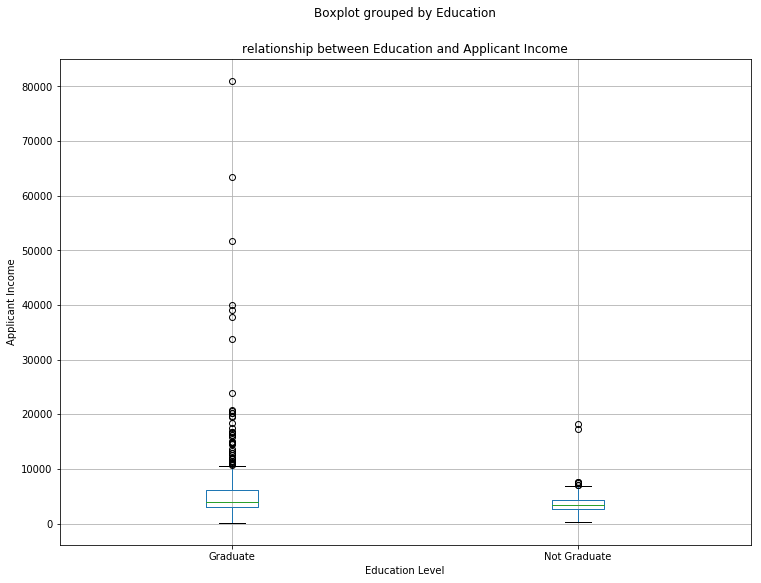

In [259]:
#Plot the relationship between Education and ApplicantIncome.
plt.figure(figsize = (12, 9))
loan[['ApplicantIncome', 'Education']].boxplot(column = 'ApplicantIncome', 
                                                  by ='Education', figsize = (12, 9))
plt.title('relationship between Education and Applicant Income')
plt.ylabel('Applicant Income')
plt.xlabel('Education Level')
plt.tight_layout

In [261]:
#Plot the relationship between Property_Area and Loan_Status.
PropCrossLoan =  pd.crosstab(loan['Property_Area'], loan['Loan_Status'])
PropCrossLoan

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


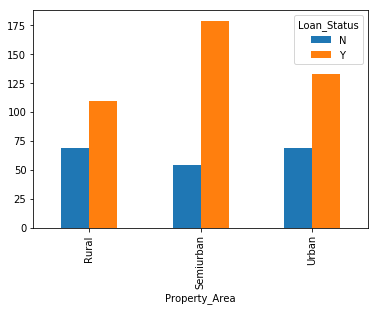

In [263]:
#Plot the relationship between Property_Area and Loan_Status.
PropCrossLoan.plot.bar()

Text(0.5,0,'Income Range')

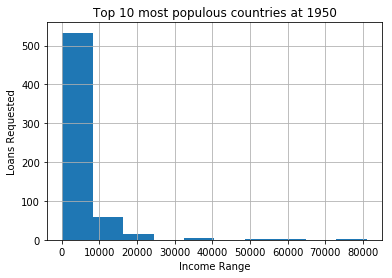

In [267]:
axis1 = loan['ApplicantIncome'].hist()
axis1.set_title('Top 10 most populous countries at 1950')
axis1.set_ylabel('Loans Requested')
axis1.set_xlabel('Income Range')

In [269]:
#Categorize the ApplicantIncome into low (0-2000), medium (2000-20000), High(20000-50000), and Rich(>50000).
ranges = [0, 2000, 20000, 50000, float('inf')]
levels = ['low', 'medium', 'high', 'rich']
newCategories = pd.cut(loan['ApplicantIncome'], ranges, labels = levels)
newCategories

0      medium
1      medium
2      medium
3      medium
4      medium
5      medium
6      medium
7      medium
8      medium
9      medium
10     medium
11     medium
12     medium
13        low
14        low
15     medium
16     medium
17     medium
18     medium
19     medium
20     medium
21     medium
22     medium
23     medium
24     medium
25     medium
26     medium
27     medium
28        low
29     medium
        ...  
584    medium
585    medium
586    medium
587    medium
588    medium
589    medium
590    medium
591    medium
592    medium
593    medium
594    medium
595    medium
596    medium
597    medium
598    medium
599    medium
600       low
601    medium
602    medium
603    medium
604    medium
605    medium
606    medium
607    medium
608    medium
609    medium
610    medium
611    medium
612    medium
613    medium
Name: ApplicantIncome, Length: 614, dtype: category
Categories (4, object): [low < medium < high < rich]

In [270]:
loan['ApplicantStatus'] = newCategories

Text(0.5,0,'Income Range')

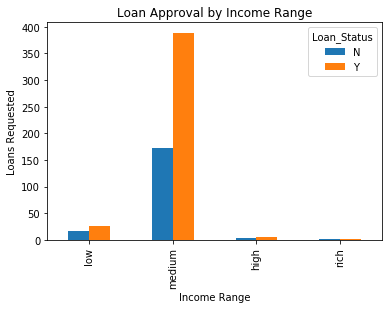

In [273]:
#Plot the relationship between Loan_Status and the categories of ApplicantIncome.
axis2 = pd.crosstab(loan['ApplicantStatus'], loan['Loan_Status']).plot.bar()
axis2.set_title('Loan Approval by Income Range')
axis2.set_ylabel('Loans Requested')
axis2.set_xlabel('Income Range')

Text(0.5,0,'Income Range')

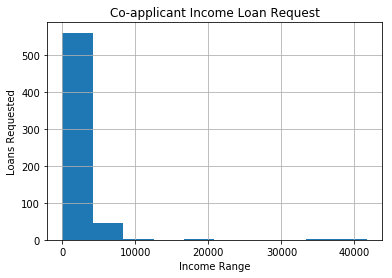

In [281]:
Coapp = loan['CoapplicantIncome'].hist()
Coapp.set_title('Co-applicant Income Loan Request')
Coapp.set_ylabel('Loans Requested')
Coapp.set_xlabel('Income Range')

In [276]:
#Categorize the CoapplicantIncome into low (0-2000), medium (2000-10000), High(10000-20000), 
#and Rich(>20000).
cate_Coapp = [0, 2000, 10000, 20000, float('inf')]
range_Coapp = ['low', 'medium', 'High', 'Rich']
new_Coapp = pd.cut(loan.CoapplicantIncome, cate_Coapp, labels = range_Coapp)
new_Coapp

0         NaN
1         low
2         NaN
3      medium
4         NaN
5      medium
6         low
7      medium
8         low
9        High
10        low
11        low
12     medium
13     medium
14        low
15        NaN
16        NaN
17        NaN
18        NaN
19     medium
20        NaN
21     medium
22        low
23        low
24     medium
25        NaN
26     medium
27        low
28        NaN
29     medium
        ...  
584       low
585    medium
586       low
587       NaN
588       NaN
589       NaN
590    medium
591       NaN
592       NaN
593    medium
594       NaN
595       NaN
596       low
597       NaN
598       NaN
599       NaN
600      Rich
601    medium
602       NaN
603    medium
604       NaN
605    medium
606    medium
607       low
608       low
609       NaN
610       NaN
611       low
612       NaN
613       NaN
Name: CoapplicantIncome, Length: 614, dtype: category
Categories (4, object): [low < medium < High < Rich]

In [286]:
#Plot the relationship between Loan_Status and the categories of CoapplicantIncome.
loan['Categorized_Coapplicant'] = new_Coapp
axis3 = pd.crosstab(loan['Categorized_Coapplicant'], loan['Loan_Status'])
axis3

Loan_Status,N,Y
Categorized_Coapplicant,,
low,38,106
medium,53,138
High,3,1
Rich,2,0


Text(0.5,0,'Income Range')

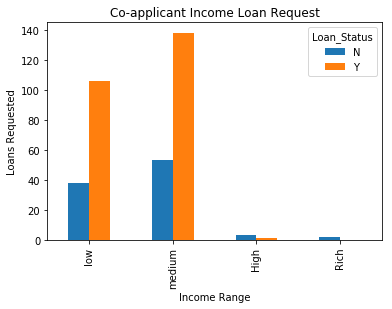

In [287]:
axis3 = pd.crosstab(loan['Categorized_Coapplicant'], loan['Loan_Status']).plot.bar()
axis3.set_title('Co-applicant Income Loan Request')
axis3.set_ylabel('Loans Requested')
axis3.set_xlabel('Income Range')

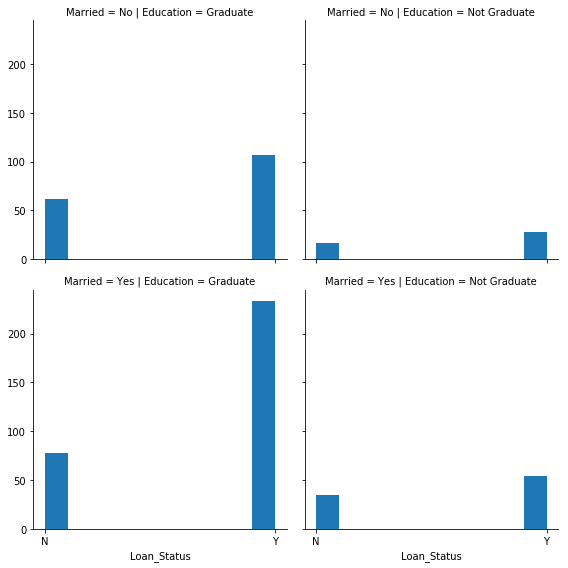

In [291]:
#Develop plots to show the relationships between Load_Status and Education, Married, Credit_History.
rel = sns.FacetGrid(loan, col='Education', row="Married", size=4)
rel = rel.map(plt.hist, "Loan_Status")

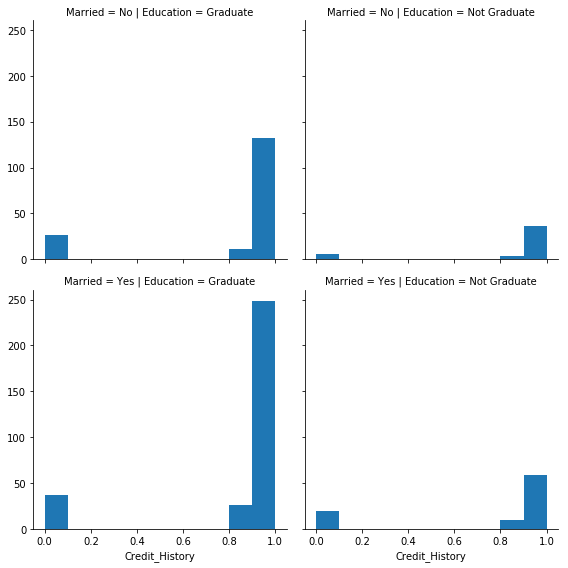

In [292]:
rel = sns.FacetGrid(loan, col='Education', row="Married", size=4)
rel = rel.map(plt.hist, "Credit_History")


In [ ]:
#For all the columns with no-numerical data (except for Loan_ID), convert the values to numerical 
#categorical representations. (Gender, Married, Dependents, education, Self_Employed, Property_Area)
loan['Gender'].replace({'Male': 1, 'Female': 0}, inplace = True)
loan['Married'].replace({'No': 0, 'Yes': 1}, inplace = True)
loan['Dependents'].replace({'0':0, '1':1, '2':2, '3+':3}, inplace= True)
loan['Education'].replace({'Graduate':1, 'Not Graduate': 0}, inplace= True)
loan['Self_Employed'].replace({'Yes':1, 'No': 0}, inplace= True)
loan['Loan_Status'].replace({"Y":1,"N":0}, inplace= True)
loan['Property_Area'].replace({'Urban':2, 'Semiurban': 1, 'Rural':0}, inplace= True)

In [243]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
ApplicantStatus      614 non-null object
dtypes: float64(4), int64(8), object(2)
memory usage: 67.2+ KB


#### Question 2:
Download the data set `imdb_1000.csv` and load it into a data frame. This data set contains rating information for about one thousand of movies. The following columns appear in the data set: star_rating, title, content_rating, genre, duration, and actors_list. Write code to clean and wrangle the data as instructed below:
- The actors_list column contains strings each of which should have three actor names. Extract the three actor names and add three new columns: actor_1, actor_2, actor_3 in the data set. After the extraction, remove the column actors_list.

**Note**: Your solution must be different from the kernel at: [https://www.kaggle.com/pkabir/imdb-movies-text-data-cleaning](https://www.kaggle.com/pkabir/imdb-movies-text-data-cleaning)

In [137]:
# Write your code below
movies = pd.read_csv('datasets/imdb_1000.csv')

In [139]:
#get list of actor, need to remove the following characters:
# [, u, ] 
movies['actors_list'].loc[0]

"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']"

In [140]:
#remove opening square bracket "[", remove "u", remove close quote "'" 
# remove close bracket "]"
rm_opsq = lambda s: re.sub(r'\[', '',s)
rm_u = lambda s: re.sub(r'u\'','', s)
rm_quote = lambda s: re.sub(r'\'','', s)
rm_clsq = lambda s: re.sub(r'\]','', s)
#split actor_list by comma to create an array or each actor
split_actor = lambda s: s.split(',')

In [141]:
actors = movies['actors_list'].map(rm_opsq).map(rm_u).map(rm_quote).map(rm_clsq)

In [142]:
#split actor list by string and create dataframe called actors_df
#and place the actors into 3 columns for each movie
actors_df = pd.DataFrame(actors.map(split_actor).tolist(),
                        columns =['actor1', 'actor2', 'actor3'])


In [143]:
#add actors_df to movies
movies['actor1'] = actors_df['actor1']
movies['actor2'] = actors_df['actor2']
movies['actor3'] = actors_df['actor3']
# drop actors list column
movies.drop(columns = ['actors_list'], inplace= True)

In [293]:
movies.head(10)

,star_rating,title,content_rating,genre,duration,actor1,actor2,actor3
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,John Travolta,Uma Thurman,Samuel L. Jackson
5,8.9,12 Angry Men,NOT RATED,Drama,96,Henry Fonda,Lee J. Cobb,Martin Balsam
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,Clint Eastwood,Eli Wallach,Lee Van Cleef
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,Elijah Wood,Viggo Mortensen,Ian McKellen
8,8.9,Schindler's List,R,Biography,195,Liam Neeson,Ralph Fiennes,Ben Kingsley
9,8.9,Fight Club,R,Drama,139,Brad Pitt,Edward Norton,Helena Bonham Carter
